<a href="https://colab.research.google.com/github/mohzary/python-deep-learning-f19/blob/master/Lab%202/Q7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **To Apply Autoencoders on MNIST dataset and show the encoding and decoding on a particular image.** 

---
Dataset: MNIST | [download](http://yann.lecun.com/exdb/mnist/)


In [0]:
# To immport layers that we need to solve q6
from keras.layers import Input, Dense

# In this question we choose to use functional API that why we import model
from keras.models import Model

# this is the size of our encoded layer
Q7_encoding_dim_size = 32  

# our input layer it is of size 784 and its type is Input, we call it Q7_input_img_layer 
Q7_input_img_layer = Input(shape=(784,))

# our "encoder" layer it is of size 32 since it must be smaller than the input layer, its type is Dense 
Q7_encoded_Layer = Dense(Q7_encoding_dim_size, activation='relu')(Q7_input_img_layer)

# # our "decoder" layer it is of size 784 since it must be similar to the input layer, its type is Dense 
Q7_decoded_Layer= Dense(784, activation='sigmoid')(Q7_encoded_Layer)

# to map input image to its reconstruction image
Q7_autoencoder = Model(Q7_input_img_layer, Q7_decoded_Layer)

# To map an input image to its encoded output
Q7_encoder = Model(Q7_input_img_layer, Q7_encoded_Layer)

# To make a placeholder for an encodedlayer input
Q7_encoded_input = Input(shape=(Q7_encoding_dim_size,))

# To get the last layer of the Q7_autoencoder model
Q7_decoder_layer = Q7_autoencoder.layers[-1]

# To create the decoder model
Q7_decoder = Model(Q7_encoded_input, Q7_decoder_layer(Q7_encoded_input))

# To compile our model
Q7_autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

In [48]:
# To load images dataset (mnist)

from keras.datasets import mnist
import numpy as np

# to load the dataset
(X_train_Q7, _), (X_test_Q7, _) = mnist.load_data()

#To normalize images 
X_train_Q7 = X_train_Q7.astype('float32') / 255.
X_test_Q7 = X_test_Q7.astype('float32') / 255.

# To reshape the image matrics
X_train_Q7 = X_train_Q7.reshape((len(X_train_Q7), np.prod(X_train_Q7.shape[1:])))
X_test_Q7 = X_test_Q7.reshape((len(X_test_Q7), np.prod(X_test_Q7.shape[1:])))

11493376/11490434 [==============================] - 2s 0us/step


In [51]:
# To start the trainig we use history variable to save trainig data so we can visualize the training and validition results later
Q7_history = Q7_autoencoder.fit(X_train_Q7, X_train_Q7,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test_Q7, X_test_Q7))


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 1s 21us/step - loss: 0.1224 - acc: 0.8114 - val_loss: 0.1200 - val_acc: 0.8106
Epoch 2/50
60000/60000 [==============================] - 1s 21us/step - loss: 0.1207 - acc: 0.8116 - val_loss: 0.1185 - val_acc: 0.8109
Epoch 3/50
60000/60000 [==============================] - 1s 21us/step - loss: 0.1192 - acc: 0.8118 - val_loss: 0.1169 - val_acc: 0.8110
Epoch 4/50
60000/60000 [==============================] - 1s 22us/step - loss: 0.1178 - acc: 0.8120 - val_loss: 0.1156 - val_acc: 0.8113
Epoch 5/50
60000/60000 [==============================] - 1s 21us/step - loss: 0.1165 - acc: 0.8121 - val_loss: 0.1143 - val_acc: 0.8114
Epoch 6/50
60000/60000 [==============================] - 1s 22us/step - loss: 0.1153 - acc: 0.8123 - val_loss: 0.1130 - val_acc: 0.8115
Epoch 7/50
60000/60000 [==============================] - 1s 21us/step - loss: 0.1141 - acc: 0.8124 - val_loss: 0.1120 - val_acc

In [52]:
#To evaluate our autoencoder model  and show the validation result 
score,acc = Q7_autoencoder.evaluate(X_test_Q7, X_test_Q7,verbose=2)
print("Loss Score: %.2f" % (score))
print("Accuracy: %.2f%%" % (acc*100))
print(Q7_autoencoder.metrics_names)

Loss Score: 0.10
Accuracy: 81.30%
['loss', 'acc']


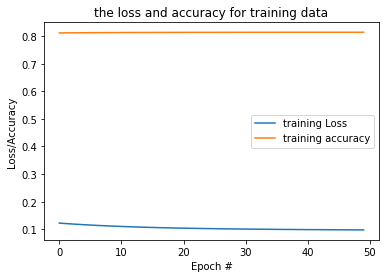

In [53]:
#plot the loss and accuracy for training data 
import matplotlib.pyplot as plt
plt.figure()
plt.plot(np.arange(0, 50), Q7_history.history["loss"], label="training Loss")
plt.plot(np.arange(0, 50), Q7_history.history["acc"], label="training accuracy")
plt.title("the loss and accuracy for training data")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="best")

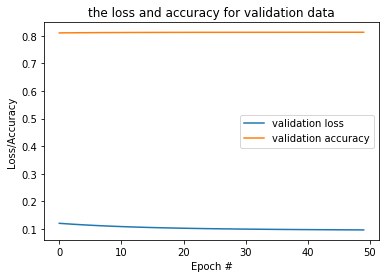

In [54]:
#plot the loss and accuracy for validation data. 
plt.figure()
plt.plot(np.arange(0, 50), Q7_history.history["val_loss"], label="validation loss")
plt.plot(np.arange(0, 50), Q7_history.history["val_acc"], label="validation accuracy")

plt.title("the loss and accuracy for validation data")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="best")

The input image is: 


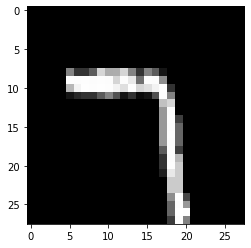

The input image: 


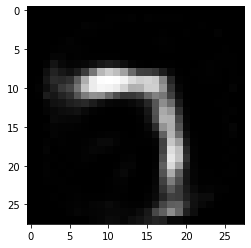

In [57]:
#show the encoding and decoding on a particular image.

#To predict a new image using the encoder model first
Q7_encoded_image =  Q7_encoder.predict(X_test_Q7[[5999],:])

#To predict the encoded image using the decoder model 
Q7_decoded_imgs = Q7_decoder.predict(Q7_encoded_image)


#To dispaly the input image 
print("The input image is: ")
plt.imshow(X_test_Q7[5999].reshape((28, 28)), cmap = 'gray')
plt.show()

#To display the decoded image 
print("The input image: ")
plt.imshow(Q7_decoded_imgs[0].reshape((28, 28)), cmap = 'gray')
plt.show()